# LabSheet 3.1 #

In [34]:
import os

In [35]:
import sqlite3 as sq

connection = sq.connect('china_usa.db')
curs = connection.cursor() 

curs.execute("""CREATE TABLE IF NOT EXISTS usa_and_china (Measurement_ID INTEGER PRIMARY KEY AUTOINCREMENT, Country_Name VARCHAR(20), Country_Code VARCHAR(3), Indicator_Name VARCHAR(255), Indicator_Code VARCHAR(30), "1960" REAL, "1961" REAL, "1962" REAL, "1963" REAL, "1964" REAL, "1965" REAL, "1966" REAL, "1967" REAL, "1968" REAL, "1969" REAL, "1970" REAL, "1971" REAL, "1972" REAL, "1973" REAL, "1974" REAL, "1975" REAL, "1976" REAL, "1977" REAL, "1978" REAL, "1979" REAL, "1980" REAL, "1981" REAL, "1982" REAL, "1983" REAL, "1984" REAL, "1985" REAL, "1986" REAL, "1987" REAL, "1988" REAL, "1989" REAL, "1990" REAL, "1991" REAL, "1992" REAL, "1993" REAL, "1994" REAL, "1995" REAL, "1996" REAL, "1997" REAL, "1998" REAL, "1999" REAL, "2000" REAL, "2001" REAL, "2002" REAL, "2003" REAL, "2004" REAL, "2005" REAL, "2006" REAL, "2007" REAL, "2008" REAL, "2009" REAL, "2010" REAL, "2011" REAL, "2012" REAL, "2013" REAL, "2014" REAL, "2015" REAL, "2016" REAL, "2017" REAL, "2018" REAL, "2019" REAL, "2020" REAL, "2021" REAL);""" )


connection.commit()



In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

usa_and_china = pd.read_csv(r'China_VS_USA_Data.csv') 

usa_and_china.to_sql('usa_and_china', connection, if_exists='replace', index=False)

def database_query(query):
    # Run select sql query
    curs.execute(query)

    records = curs.fetchall()
    for row in records:
        # show row
        print(row)


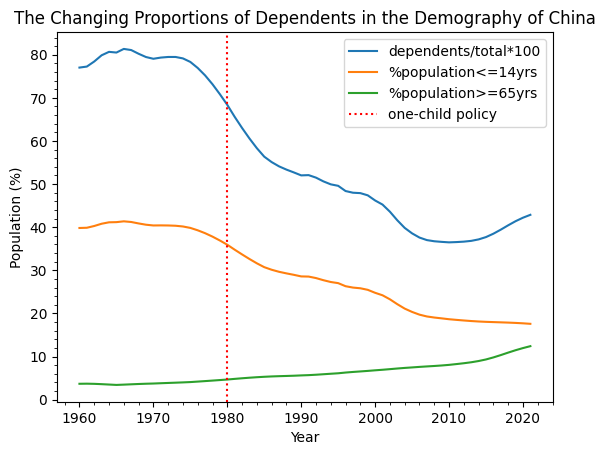

In [37]:
'''
questions...
1. a comparison of the age dependency ratio of China with its proportion of population above age of 65 or below 14 (retirement age and childhood) 
'''
curs.execute('SELECT * FROM usa_and_china WHERE "Indicator Code" IN ("SP.POP.DPND","SP.POP.65UP.TO.ZS","SP.POP.0014.TO.ZS")')
records=curs.fetchall()
df = pd.DataFrame(records)

years = range(1960,2022)
yearsList = []
for y in years:
    yearsList.append(y)


dependPer = []
for x in range(4,66):
    dependPer.append(float(df[x][0]))


youngPer = []
for x in range(4,66):
    youngPer.append(float(df[x][1]))


oldPer = []
for x in range(4,66):
    oldPer.append(float(df[x][2]))


plt.plot(yearsList, dependPer)
plt.plot(yearsList, youngPer)
plt.plot(yearsList, oldPer)
plt.axvline(x = 1980, color = 'r', linestyle='dotted')
plt.xlabel('Year')
plt.ylabel('Population (%)')
plt.title('The Changing Proportions of Dependents in the Demography of China')
plt.legend(["dependents/total*100", "%population<=14yrs", "%population>=65yrs","one-child policy" ])
plt.minorticks_on()
plt.show()



crude birth rate per year code: SP.DYN.CBRT.IN
crude death rate per year code: SP.DYN.CDRT.IN
Fertility rate / births per woman code: SP.DYN.TFRT.IN
GDP per capita (constant 2015 US$) : NY.GDP.PCAP.KD
Life expectancy at birth, female (years): SP.DYN.LE00.FE.IN
Life expectancy at birth, male (years): SP.DYN.LE00.MA.IN

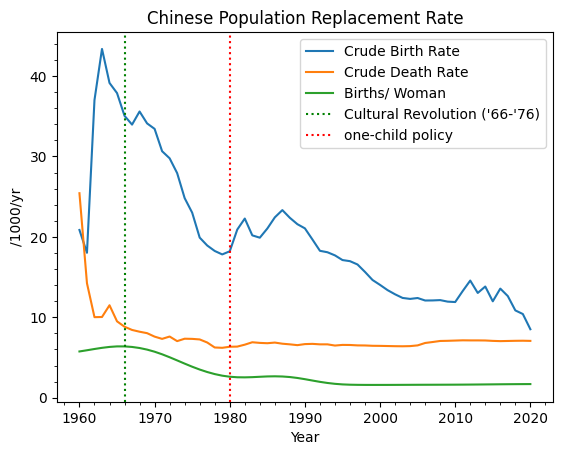

In [44]:
from numpy import double


curs.execute('SELECT * FROM usa_and_china WHERE "Indicator Code" IN ("SP.DYN.CBRT.IN","SP.DYN.CDRT.IN","SP.DYN.TFRT.IN")')
records=curs.fetchall()
df = pd.DataFrame(records)

years = range(1960,2021)
yearsList = []
for y in years:
    yearsList.append(y)

birthRate = []
for x in range(4,65):
    birthRate.append(double(df[x][0]))

deathRate = []
for x in range(4,65):
    deathRate.append(double(df[x][1]))

fertilityRate = []
for x in range(4,65):
    fertilityRate.append(double(df[x][2]))

plt.plot(yearsList, birthRate)
plt.plot(yearsList, deathRate)
plt.plot(yearsList, fertilityRate)
plt.axvline(x = 1966, color = 'g', linestyle='dotted')
plt.axvline(x = 1980, color = 'r', linestyle='dotted')
plt.xlabel('Year')
plt.ylabel('/1000/yr')
plt.title('Chinese Population Replacement Rate')
plt.legend(["Crude Birth Rate", "Crude Death Rate", "Births/ Woman","Cultural Revolution ('66-'76)","one-child policy" ])
plt.minorticks_on()
plt.show()


Population, total: SP.POP.TOTL
Population ages 0-14 (% of total population): SP.POP.0014.TO.ZS
Population ages 15-64 (% of total population): SP.POP.1564.TO.ZS
Population ages 65 and above (% of total population): SP.POP.65UP.TO.ZS